### Produce a Slope Chart to show Mar and Oct times with Reference Lines for Normal/Elite Men/Women

Credits : I learnt this from  and have used :  https://github.com/empathy87/storytelling-with-data

In [231]:
# Try to use Seaborn/Matplotlib to replicate another cool viz from Cole Nusaumbber Knaflic's book Storytelling with Data.
# Inspiration from :
# https://github.com/adamribaudo/storytelling-with-data-ggplot
# Using code from the excellent:
# https://github.com/empathy87/storytelling-with-data

## Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import transforms
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter

%matplotlib inline

In [98]:
df =   pd.read_csv ( '..\Data\Staging\chart1_data.csv')
df

,ANALYSIS_CATEGORY,GENDER,time_mins_Apr,time_mins_Oct,Label
0,Elite,Female,92.481164,90.855801,Elite
1,Elite,Male,82.655977,81.603402,Elite
2,Normal,Female,143.687247,144.383883,Normal
3,Normal,Male,123.961147,125.796245,Normal
4,Us,Female,163.250000,134.900000,Ellena
5,Us,Male,117.400000,109.066667,John


### Set up fonts / colours etc

In [5]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'

In [29]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [7]:
# Thank you to Andrey / empathy87 on github

def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')
        

### Simplify the Data

In [119]:
df['Apr_hr'] =  (df.time_mins_Apr.astype (int) / 60.0 ).astype (int)
df['Apr_min'] = (df.time_mins_Apr % 60).astype (int)
df['Apr_time_readable'] = df.Apr_hr.astype(str) + 'hr:' + df.Apr_min.astype (str) + 'min'

df['Oct_hr'] =  (df.time_mins_Oct.astype (int) / 60.0 ).astype (int)
df['Oct_min'] = (df.time_mins_Oct % 60).astype (int)
df['Oct_time_readable'] = df.Oct_hr.astype(str) + 'hr:' + df.Oct_min.astype (str) + 'min'

df

,ANALYSIS_CATEGORY,GENDER,time_mins_Apr,time_mins_Oct,Label,Apr_hr,Apr_min,Apr_time_readable,Oct_hr,Oct_min,Oct_time_readable
0,Elite,Female,92.481164,90.855801,Elite,1,32,1hr:32min,1,30,1hr:30min
1,Elite,Male,82.655977,81.603402,Elite,1,22,1hr:22min,1,21,1hr:21min
2,Normal,Female,143.687247,144.383883,Normal,2,23,2hr:23min,2,24,2hr:24min
3,Normal,Male,123.961147,125.796245,Normal,2,3,2hr:3min,2,5,2hr:5min
4,Us,Female,163.250000,134.900000,Ellena,2,43,2hr:43min,2,14,2hr:14min
5,Us,Male,117.400000,109.066667,John,1,57,1hr:57min,1,49,1hr:49min


In [144]:
Y1 = list (df.loc[ (df.Label=='John') | (df.Label=='Ellena'), ['time_mins_Apr'] ].time_mins_Apr)
Y2 = list ( df.loc[ (df.Label=='John') | (df.Label=='Ellena'), ['time_mins_Oct'] ].time_mins_Oct)

Y1_lab = list (df.loc[ (df.Label=='John') | (df.Label=='Ellena'), ['Apr_time_readable'] ].Apr_time_readable)
Y2_lab = list ( df.loc[ (df.Label=='John') | (df.Label=='Ellena'), ['Oct_time_readable'] ].Oct_time_readable)

lab = ['Ellena', 'John']

Y1_lab


['2hr:43min', '1hr:57min']

#### Get the ref lines

In [198]:
Y_ref = df.loc[ (df.Label.isin(['Elite', 'Normal'])), 'time_mins_Oct'  ]

Y_ref_readable = list (df.loc[ (df.Label.isin(['Elite', 'Normal'])), 'Oct_time_readable'  ] )

Y_ref_label = ['Female Avg', 'Male Avg', 'Female Avg', 'Male Avg']

Y_ref_readable

['1hr:30min', '1hr:21min', '2hr:24min', '2hr:5min']

In [155]:
Y_ref

0    1hr:30min
1    1hr:21min
2    2hr:24min
3     2hr:5min
Name: Oct_time_readable, dtype: object

### Build the chart

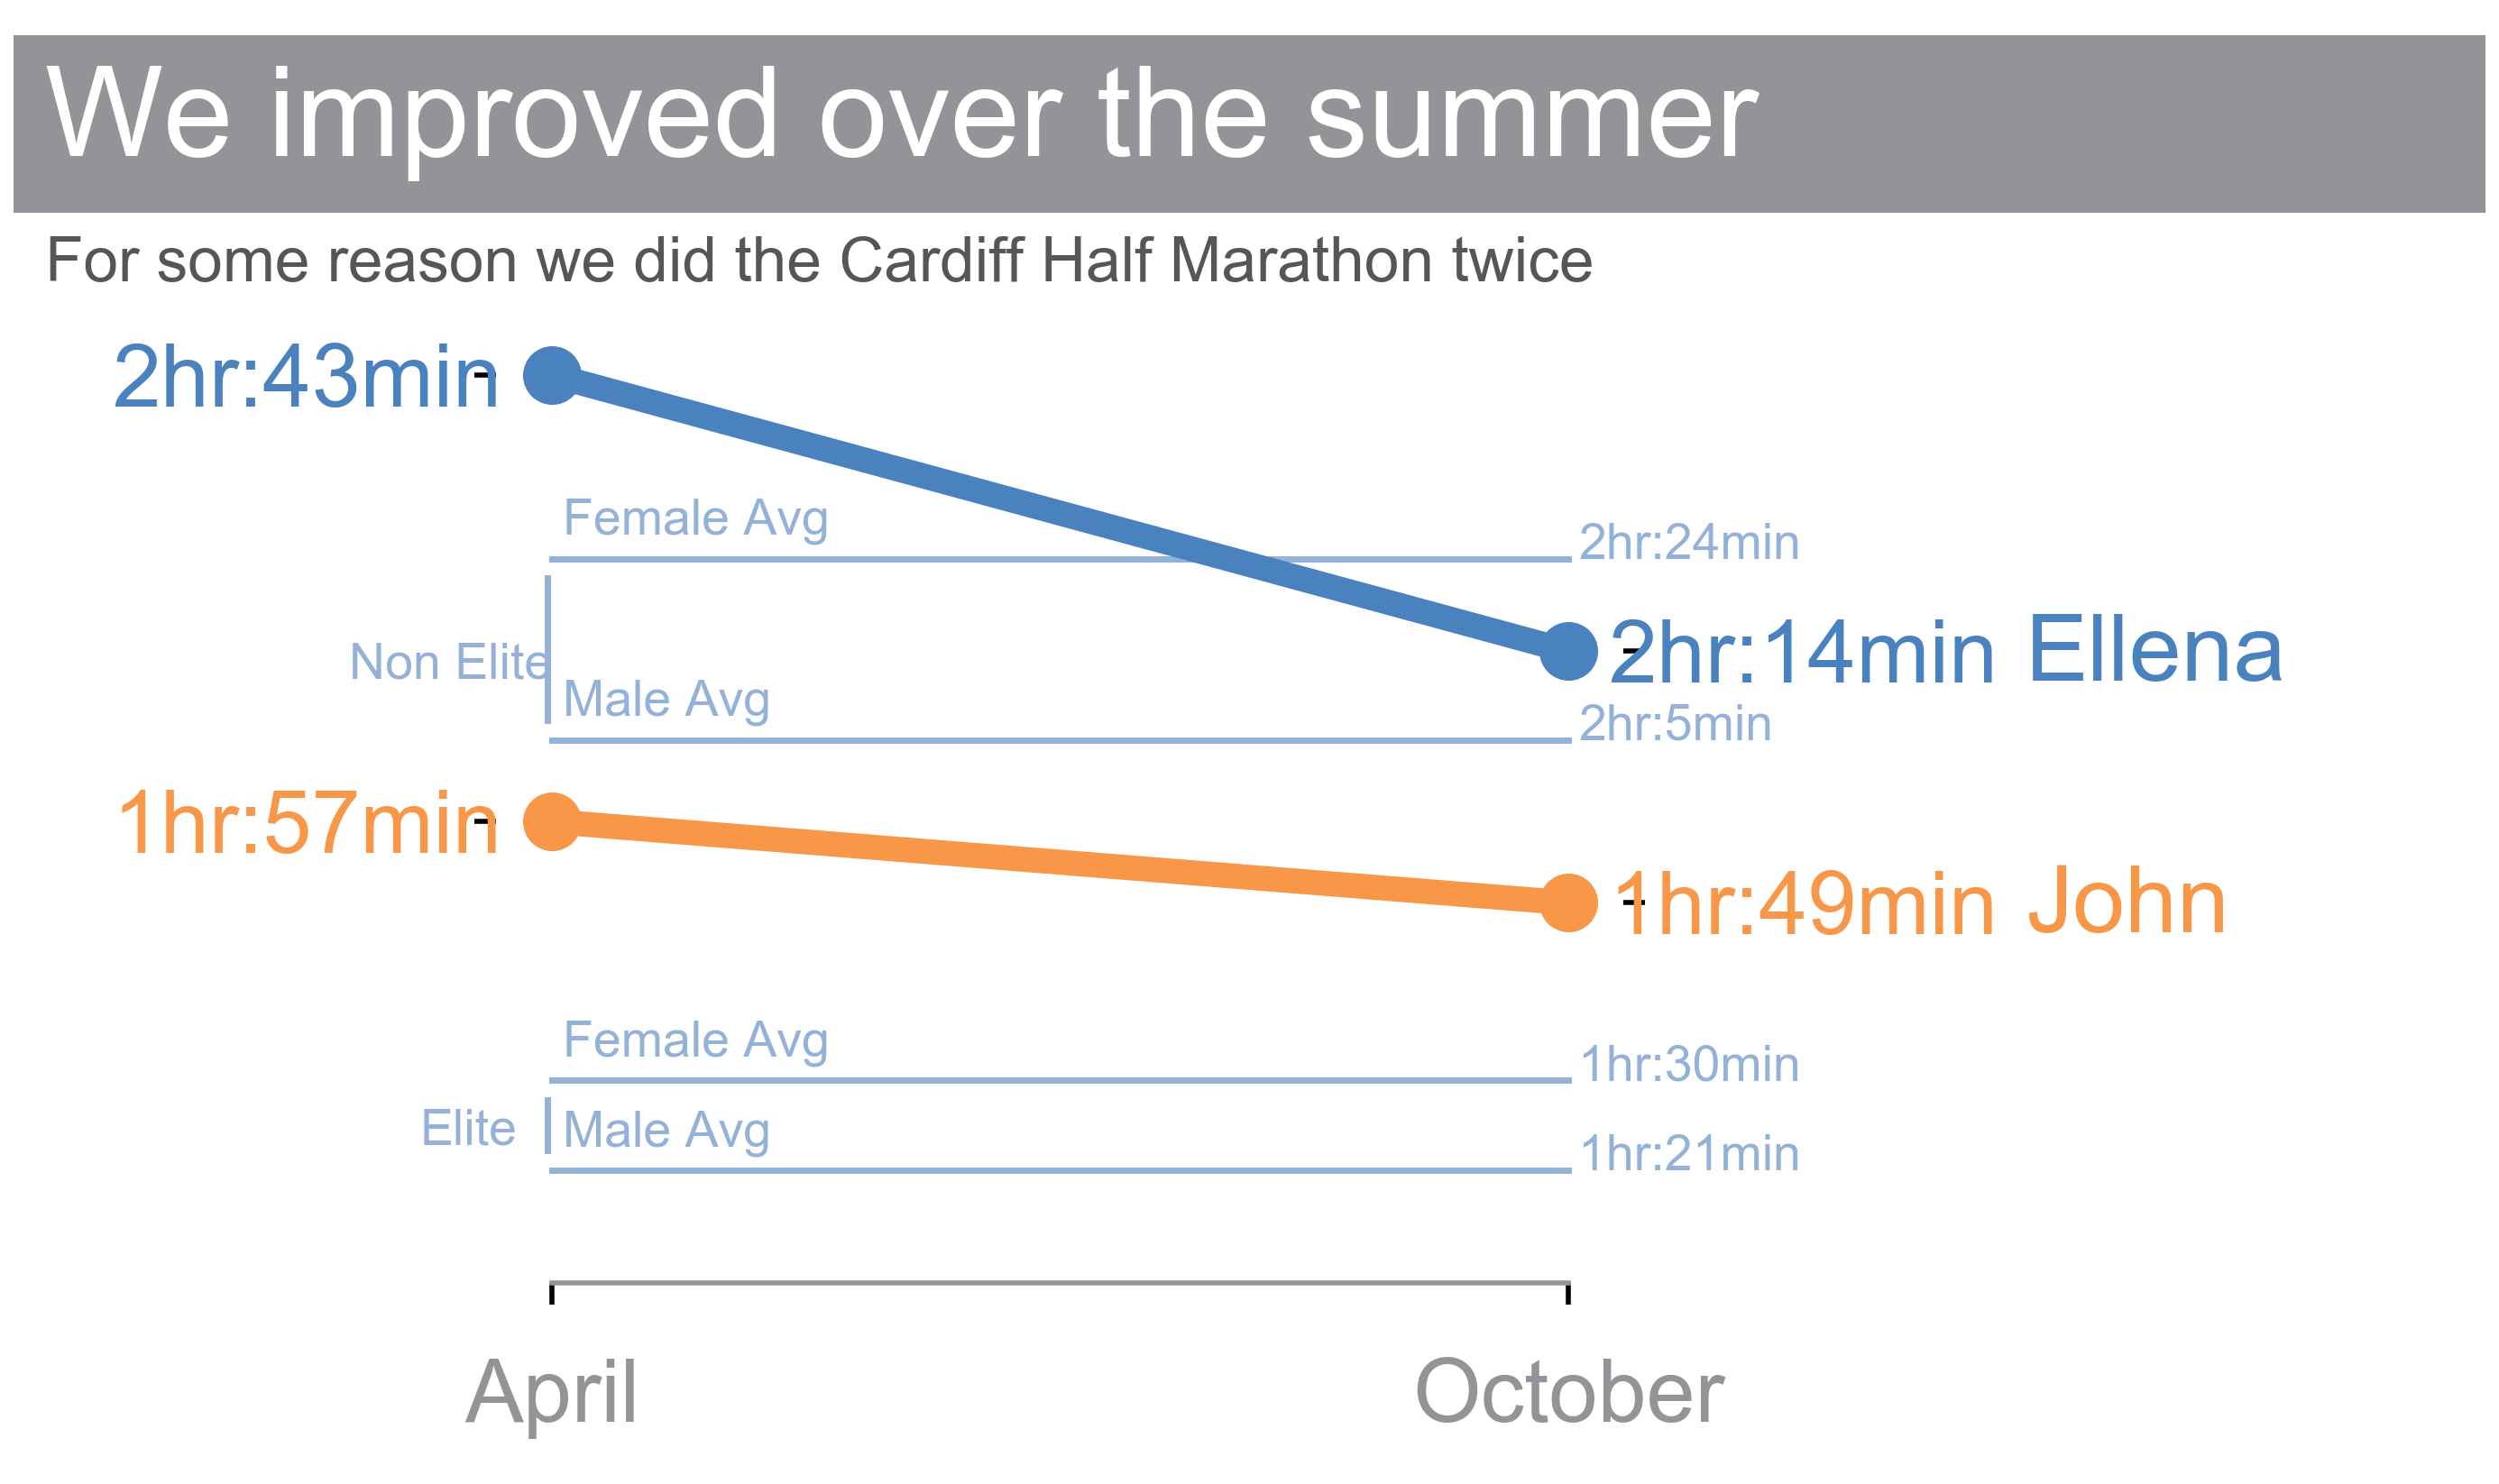

In [241]:


ref_line_colour = BLUE3

# create new figure
width = 5
fig = plt.figure(figsize=(width, width / 1.62), dpi=500)

ax0 = fig.add_axes( (0,0,1,1))
ax0.axis('Off') # don't draw anything.


# The title will force the left margin to get bigger
ax0.text(0.00, 0.92,
         'We improved over the summer' + ' ' * 20,
         fontsize=20,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 5,  # add more padding
               'edgecolor': 'none'})  # no border


# The title will force the left margin to get bigger
ax0.text(0, 0.83,
         'For some reason we did the Cardiff Half Marathon twice' ,
         fontsize=10,
         color=GRAY3)


ax1 = fig.add_axes((0.2, 0.11, 0.5, 0.7))
ax2 = ax1.twinx()


# set properties for axes object
plt.setp(ax1,
         xticks=[0, 1],  # two x-ticks only 0 and 1
         xticklabels=['April', 'October'],  # with text labels
         yticks=Y1,  # tick for all pre- responses %
         yticklabels=[str(v) for v in Y1_lab ]
        )  # with n% labels


# set properties for secondary axes object
plt.setp(ax2,
         yticks=Y2,  # tick for all post- responses %
         yticklabels=[str(v) for v in Y2_lab])  # with n% labels

# remove chart border


ax2.set_ylim([70, 170])
ax1.set_ylim([70, 170])


# assign colors for responses
C = [BLUE2, ORANGE1]


# --------------------------------------------------------------------------    
    
# Add in the reference lines
for i in range(4):
    # draw circles
    #ax1.scatter([0, 1], [Y1[i], Y2[i]], color=C[i], s=70)
    # draw line
    ax1.plot([0, 1], [Y_ref[i], Y_ref[i]], color=ref_line_colour, linewidth=1)
    # Labels on the right
    ax1.text( 0.01,
             Y_ref[i] + 2.5,
             Y_ref_label[i],
             fontsize=8,
             linespacing=1.5,
             color=ref_line_colour)    

    # Reference Times
    ax1.text(  1.01,
              Y_ref[i],
             Y_ref_readable[i],
             fontsize=8,
             linespacing=1.1,
             color=ref_line_colour)    
    

# Plot subtitle text to the left of the two reference lines
y_elite_avg = ( (Y_ref[0] + Y_ref[1]  )   / 2 ) - 3
ax1.text(    -0.13,
             y_elite_avg + 1,
             'Elite',
             fontsize=8,
             linespacing=1.5,
             color=ref_line_colour)

# connet the text to the reference lines
ax1.plot([-0.005, -0.005], [ Y_ref[0] -2 , Y_ref[1] +2 ], color=ref_line_colour, linewidth=1)


y_normal_avg = ( (Y_ref[2] + Y_ref[3]  )   / 2 ) - 3
ax1.text(    -0.20,
             y_normal_avg,
             'Non Elite',
             fontsize=8,
             linespacing=1.5,
             color=ref_line_colour)


# connet the text to the reference lines
ax1.plot([-0.005, -0.005], [ Y_ref[2] -2 , Y_ref[3] +2 ], color=ref_line_colour, linewidth=1)
    
# --------------------------------------------------------------------------    
# End of ref lines
# --------------------------------------------------------------------------    
    

# --------------------------------------------------------------------------    
# Slope lines
# --------------------------------------------------------------------------    
    
# draw slopegraph lines with circles at ends
for i in range(2):
    # draw circles
    ax1.scatter([0, 1], [Y1[i], Y2[i]], color=C[i], s=70)
    # draw line
    ax1.plot([0, 1], [Y1[i], Y2[i]], color=C[i], linewidth=4)

   # addleft  label(times)
    plt.text(1.45,
             Y2[i] -3 ,
             lab[i],
             fontsize=15,
             linespacing=1.5,
             color=C[i])
    
# remove chart border
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)

# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY7)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# configure left y axis.
for i, item in enumerate (ax1.get_yticklabels() ):
    item.set_fontsize(14)
    item.set_color( C[i])
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0.11, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)    
    
# configure right y axis.
for i, item in enumerate (ax2.get_yticklabels() ):
    item.set_fontsize(14)
    item.set_color( C[i])
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(-0.13, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# --------------------------------------------------------------------------    
# Slope lines
# --------------------------------------------------------------------------    

# add bottom spine with gray color and bounds between 0 and 1
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_bounds(0, 1)
ax1.spines['bottom'].set_color(GRAY7)     


fig.savefig ( '..\Plots\Chart1')
